In [1]:
import cv2
from matplotlib import pyplot as plt
import lane_detection
import lane_following
import network_stream_capture as nsc

In [2]:
IP_ADDRESS = "192.168.1.102"

In [3]:
vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")

img = None

MAX_RETRY = 100
count = 0
while count < MAX_RETRY:
    count += 1
    # Obtain the frame
    ret, frame = vcap.read()

    # Check frame was received successfully
    if ret:
        # got a frame, close the cap and return the frame
        print(" got a frame ")
        img = frame
        vcap.release()

vcap.release()

[ERROR:0@34.643] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): rtsp://192.168.1.102:8554/rovcam in function 'icvExtractPattern'




In [4]:
type(img)


NoneType

TypeError: Image data of dtype object cannot be converted to float

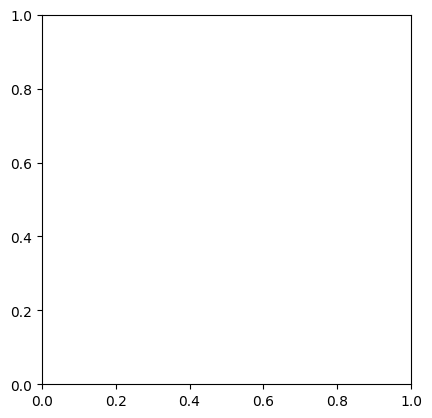

In [4]:
plt.imshow(img)
cv2.imwrite("AUV_Stream_Photo.png", img)


In [15]:
#nsc.main(IP_ADDRESS)
img = cv2.imread("AUV_Stream_Photo.png")
img = img[500:].copy()

/home/kevinnie/cv-intro/lane_detection.py:55: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = (slopes[j-1]/slope, (y_intercepts[j-1]/y_intercept))
/home/kevinnie/cv-intro/lane_detection.py:55: RuntimeWarning: invalid value encountered in scalar divide
  ratio = (slopes[j-1]/slope, (y_intercepts[j-1]/y_intercept))


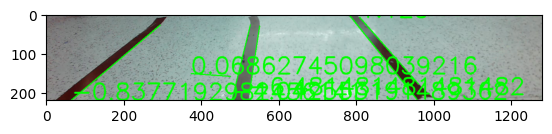

[[array([ 66, 219, 294,  28], dtype=int32), array([480, 217, 527,  27], dtype=int32)], [array([782,   2, 957, 218], dtype=int32), array([524, 205, 551,  30], dtype=int32)]]


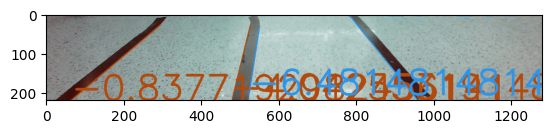

closest_Xintercept: 430.5515155690273
closest slope: -2.440136244867488
xPoint, yPoint 389.57019732897527, 100


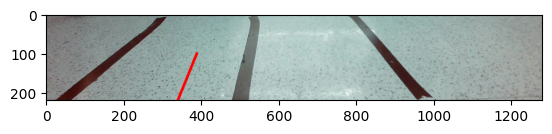

Strafe left
Turn Right


'left'

In [16]:
lines = lane_detection.detect_lines(img.copy(), 90, 130, 3, 100, 15)

lane_detection.draw_lines(img.copy(), lines)

lanes = lane_detection.detect_lanes(lines)
print(lanes)
lane_detection.draw_lanes(img.copy(), lanes)

closest_intercept, closest_slope = lane_following.get_lane_center(lanes)
y_intercept = -closest_slope * closest_intercept
yPoint = 100 # completely arbitrary amt just has to be bigger than the height of the window
xPoint = (yPoint - y_intercept)/closest_slope

print(f"closest_Xintercept: {closest_intercept}")
print(f"closest slope: {closest_slope}")
print(f"xPoint, yPoint {xPoint}, {yPoint}")

lane_following.draw_center_lane(img.copy(), (315 - y_intercept)/closest_slope, yPoint1=315, xPoint2=xPoint, yPoint2=yPoint)
lane_following.recommend_direction(xPoint, closest_slope)